Name: Meetkumar Patel  
HW5 News API + COVID-19 Dataset  
CPP CS 4650.01  

In [1]:
!pip install spacy

In [2]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


## Restart runtime NOW

In [3]:
import spacy
nlp_eng = spacy.load('en_core_web_lg')

In [4]:
!pip install newsapi-python
from newsapi import NewsApiClient

In [5]:
# All the rest import statements
import pickle
import pandas as pd
import string
from collections import Counter
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [6]:
newsapi = NewsApiClient (api_key='API_KEY_HERE')

In [7]:
# Get news articles details with a specified query.
def get_news(pagina):
  temp = newsapi.get_everything(q='coronavirus', language='en',
                              from_param='2020-09-27', to='2020-10-27', 
                              sort_by='relevancy', page=pagina)
  return temp

In [8]:
articles = list(map(get_news, range(1,6)))

In [9]:
# Use pickle and save a file
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))

filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [10]:
# Iterate through every article to retrieve required information and save in df.
dados, titles, dates, descriptions = ([] for i in range(4)) 
counter = 0
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        titles.append(title)
        description = x['description']
        descriptions.append(description)
        content = x['content']
        date = x['publishedAt']
        dates.append(date)
        dados.append({'title':titles[counter], 'date':dates[counter], 'desc':descriptions[counter], 'content':content})
        counter += 1
df = pd.DataFrame(dados)
df = df.dropna()
df.shape

(90, 4)

In [11]:
# Retrieve useful deemed keywords from the article's content.
def get_keywords_eng(content):
    result = []
    pos_tag = ['NOUN','VERB','PROPN']
    for token in nlp_eng(content):
        if (token.text in nlp_eng.Defaults.stop_words or token.text in string.punctuation):
            continue
        if (token.pos_ in pos_tag):
            result.append(token.text)
    return result

In [12]:
# Add the five keywords per article to df.
results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

In [13]:
# Save the dataset
df.to_csv('dataset.csv')
df

,title,date,desc,content,keywords
0,"Sorry, Mouthwash Isn't a Coronavirus Cure",2020-10-21T19:45:00Z,Mouthwash is designed to kill germs in your mo...,Mouthwash is designed to kill germs in your mo...,"[#Mouthwash, #designed, #kill, #germs, #mouth]"
1,Check an Airline's Coronavirus Policies Before...,2020-10-21T16:00:00Z,Navigating air travel during the COVID-19 pand...,Navigating air travel during the COVID-19 pand...,"[#Navigating, #air, #travel, #pandemic, #want]"
2,"Twitter flags, limits sharing on Trump tweet a...",2020-10-11T19:11:34Z,Twitter disabled sharing options on a tweet fr...,The tweet violated the platforms rules against...,"[#tweet, #sharing, #violated, #platforms, #rules]"
3,Coronavirus and Home Design,2020-10-22T13:00:08Z,A recent survey of architects reveals that cli...,The coronavirus pandemic is already shaping ho...,"[#pandemic, #coronavirus, #shaping, #home, #de..."
4,Coronavirus Briefing: What Happened Today,2020-10-12T22:12:24Z,What the near future may hold,Many leaders most notably President Trump have...,"[#leaders, #President, #Trump, #described, #ar..."
...,...,...,...,...,...
95,Study Finds ‘Single Largest Driver’ of Coronav...,2020-09-30T23:30:50Z,Cornell University researchers analyzing 38 mi...,"But in interviews, the Cornell researchers sai...","[#interviews, #Cornell, #researchers, #said, #..."
96,"Hope Hicks, Senior Trump Adviser, Tests Positi...",2020-10-02T02:23:49Z,"Ms. Hicks, the closest known person to the pre...",Reporters who are scheduled to travel with the...,"[#Reporters, #scheduled, #travel, #president, ..."
97,How a Small California Bar Battled to Survive ...,2020-10-06T10:02:07Z,"We chart the trials of a tavern in Oakland, Ca...",Jack Nicas contributed reporting.\r\nThe Daily...,"[#Jack, #Nicas, #contributed, #reporting, #Daily]"
98,"Nick Saban, Alabama’s Football Coach, Tests Po...",2020-10-14T22:12:04Z,The renowned Alabama coach is the most promine...,"Nick Saban, the University of Alabamas revered...","[#Saban, #Nick, #University, #Alabamas, #revered]"


In [14]:
# Print five most common words for every article
text = str(results)
print(text)

[['#Mouthwash', '#designed', '#kill', '#germs', '#mouth'], ['#Navigating', '#air', '#travel', '#pandemic', '#want'], ['#tweet', '#sharing', '#violated', '#platforms', '#rules'], ['#pandemic', '#coronavirus', '#shaping', '#home', '#design'], ['#leaders', '#President', '#Trump', '#described', '#arrival'], ['#Europe', '#wave', '#engulfing', '#countries', '#situation'], ['#Apoorva', '#Mandavilli', '#covers', '#science', '#health'], ['#season', '#ended', '#October', '#year', '#Coney'], ['#students', '#priest', '#invite', '#return', '#campus'], ['#New', '#York', '#City', '#resurgence', '#virus'], ['#Trump', '#lady', '#Melania', '#presidents', '#close'], ['#President', '#Trump', '#tests', '#developments', '#contact'], ['#control', '#outbreaks', '#White', '#House', '#Capitol'], ['#Canyons', '#School', '#District', '#suburb', '#Salt'], ['#reporting', '#colleagues', '#Sheila', '#Kaplan', '#Sharon'], ['#Americans', '#begin', '#taking', '#vaccines', '#coronavirus'], ['#way', '#colleges', '#univers

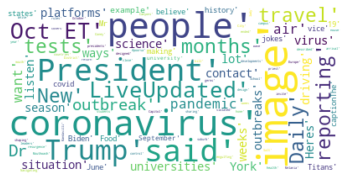

In [17]:
# Create a wordcloud of the keywords
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()